# Distribuições de Probabilidade
 
Dividiremos em duas partes:
    
1. A primeira parte contará com um *data set* artificial com dados de uma amostra normal e
    uma binomial. Faremos alguns questionamenos. 
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), também faremos questionamentos.


## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
sct.norm.ppf(0.25, loc=2.4, scale=0.04)

2.3730204099921566

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Iniciando a análise a partir da parte 1 

In [4]:
dataframe.head(5)

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


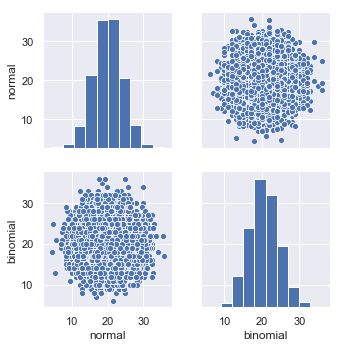

In [6]:
sns.pairplot(dataframe)

## Diferença entre os quartis (Q1, Q2 e Q3) das variáveis:  `normal` e `binomial` do `dataframe`


In [7]:
q1_norm = dataframe.describe().loc['25%','normal']
q2_norm = dataframe.describe().loc['50%','normal']
q3_norm = dataframe.describe().loc['75%','normal']

q1_binom = dataframe.describe().loc['25%','binomial']
q2_binom = dataframe.describe().loc['50%','binomial']
q3_binom = dataframe.describe().loc['75%','binomial']

print('q1_norm-q1_binom =',(q1_norm-q1_binom).round(3))

print('q2_norm-q2_binom =',(q2_norm-q2_binom).round(3))

print('q3_norm-q3_binom =',(q3_norm-q3_binom).round(3))
   

q1_norm-q1_binom = 0.31
q2_norm-q2_binom = -0.01
q3_norm-q3_binom = -0.316


Como estamos considerando distribuições aparentemente tão diferentes (discreta e contínua); note que temos variações pequenas.  Contudo, isso se deve do fato de termos uma amostra com tamanho grande, pois, usando **Teorema do limite central** temos que quanto maior  o tamanho da amostra a distribuição de probabilidade binomial se aproxima da normal, passando a mesma variável do tipo discreto a ter o mesmo tratamento que uma variável do tipo contínuo, com $\mu = n.p$ e $\sigma = \sqrt{n.p.q}$

> $$ Z = \frac{X-np}{\sqrt{n.p.q}}$$


* Agora, considerando o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. 

Vamos calcular a probabilidade nesse intervalo, usando a função de distribuição acumulada empírica (CDF empírica) da variável `normal`

In [11]:
x_s_inf = dataframe['normal'].mean() - dataframe['normal'].std()
x_s_sup = dataframe['normal'].mean() + dataframe['normal'].std()
ecdf    = ECDF(dataframe['normal'])
array   = ecdf([x_s_inf,x_s_sup]) 
print('[-s+x,x+s]=',array)
print('P(s<= X <=s) =',(array[1]-array[0]).round(3))
  

[-s+x,x+s]= [0.1571 0.8409]
P(s<= X <=s) = 0.684


* O intervalo $[\bar{x} - 2s, \bar{x} + 2s]$ 

In [12]:
x_s_inf = dataframe['normal'].mean() - 2*dataframe['normal'].std()
x_s_sup = dataframe['normal'].mean() + 2*dataframe['normal'].std()
ecdf    = ECDF(dataframe['normal'])
array   = ecdf([x_s_inf,x_s_sup]) 
print('[-s+x,x+s]=',array)
print('P(s<= X <=s) =',(array[1]-array[0]).round(3))

[-s+x,x+s]= [0.0227 0.9765]
P(s<= X <=s) = 0.954


* O intervalo $[\bar{x} - 3s, \bar{x} + 3s]$.

In [13]:
x_s_inf = dataframe['normal'].mean() -3*dataframe['normal'].std()
x_s_sup = dataframe['normal'].mean() +3*dataframe['normal'].std()
ecdf    = ECDF(dataframe['normal'])
array   = ecdf([x_s_inf,x_s_sup]) 
print('[-s+x,x+s]=',array)
print('P(s<= X <=s) =',(array[1]-array[0]).round(3))

[-s+x,x+s]= [0.0012 0.9985]
P(s<= X <=s) = 0.997


Notemos que esses valores se aproximam dos esperados teórico.

####  Calculando a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`..

In [34]:
m_binom = dataframe.describe().loc['mean','binomial'] 
v_binom = dataframe['binomial'].var()          
m_norm  = dataframe.describe().loc['mean','normal'] 
v_norm  = dataframe['normal'].var() 
print('m_binom-m_norm =',round((m_binom-m_norm),3))
print('v_binom-v_norm =',round((v_binom-v_norm),3))
    

m_binom-m_norm = 0.106
v_binom-v_norm = 0.22


Notemos que se aumentarmos $n$ (atualmente 100) a distribuição da variável `binomial` aproxima-se da normal (**Teorema do limite central**). Com isso teremos a diferença entre as médias e as variâncias menores. 

## Parte 2

### _Setup_ da parte 2

In [35]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

### Iniciando a análise da parte 2 

In [36]:
stars.head(5)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


### Resumo para cada variável do dataset 

In [38]:
df_aux = pd.DataFrame({'Type': stars.dtypes,
                      'Missing': stars.isna().sum(),
                      'Size': stars.shape[0],
                       'Unique': stars.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
mean_profile,float64,0,17897,8625,0.0
sd_profile,float64,0,17897,17861,0.0
kurt_profile,float64,0,17897,17896,0.0
skew_profile,float64,0,17897,17897,0.0
mean_curve,float64,0,17897,9000,0.0
sd_curve,float64,0,17897,17893,0.0
kurt_curve,float64,0,17897,17894,0.0
skew_curve,float64,0,17897,17894,0.0
target,bool,0,17897,2,0.0


Consideramos a variável `mean_profile` de `stars`:

1. Filtraremos apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronizando a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.
Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

3. Encontraremos os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

4. Calcularemos as probabilidades associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`

In [40]:
# 1. Filtrando...
df = stars[stars['target']==0]['mean_profile']
# 2. Padronizando...
false_pulsar_mean_profile_standardized = (df-df.mean())/df.std()
#3. Encontraremos... Usando norm.ppf
quantis_80 = sct.norm.ppf(0.80, loc=false_pulsar_mean_profile_standardized.mean(), scale=false_pulsar_mean_profile_standardized.std())
quantis_90 = sct.norm.ppf(0.90, loc=false_pulsar_mean_profile_standardized.mean(), scale=false_pulsar_mean_profile_standardized.std())
quantis_95 = sct.norm.ppf(0.95, loc=false_pulsar_mean_profile_standardized.mean(), scale=false_pulsar_mean_profile_standardized.std())
#Usando ECDF 
ecdf   = ECDF(false_pulsar_mean_profile_standardized)
array  = ecdf([quantis_80,quantis_90,quantis_95])
cdf_80 = array[0] 
cdf_90 = array[1] 
cdf_95 = array[2]
print('(cdf_80, cdf_90,cdf_95) =',(cdf_80.round(3),cdf_90.round(3),cdf_95.round(3)))


(cdf_80, cdf_90,cdf_95) = (0.806, 0.911, 0.959)


* Podemos notar que os volores encontrados fazem sentido, pois estão próximos dos esperados.
* Com isso podemos dizer que a variável `false_pulsar_mean_profile_standardized` com certo nível de significância é uma a distribuição normal.  

#### A diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1

In [42]:
#Quantis
Q1=false_pulsar_mean_profile_standardized.describe().loc['25%'] 
Q2=false_pulsar_mean_profile_standardized.describe().loc['50%']
Q3=false_pulsar_mean_profile_standardized.describe().loc['75%']
Q1_normal=sct.norm.ppf(0.25,loc=0, scale=1)
Q2_normal=sct.norm.ppf(0.50,loc=0, scale=1)
Q3_normal=sct.norm.ppf(0.75,loc=0, scale=1)
print('(Q1-Q1_normal,Q2-Q2_normal,Q3-Q3_normal)=',((Q1-Q1_normal).round(3),(Q2-Q2_normal).round(3),(Q3-Q3_normal).round(3)))


(Q1-Q1_normal,Q2-Q2_normal,Q3-Q3_normal)= (0.027, 0.04, -0.004)


* Note que os valores encontrados fazem sentido.
* Com isso podemos dizer que a distribuição da variável `false_pulsar_mean_profile_standardized` pode ser normal. 
* Também podemos pensar em teste de hipótese sobre normalidade, uma vez que existem alguns testes que utilizam essa mesma abordagem com certo nível de significância